In [23]:
"""
Random Search for Linear Regression (Enhanced)
Author: Alaa Tharwat
Date: 13.03.2025
Learning From Data (LFD) Course
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [25]:
# ---------------------------
# 1. Utility Functions
# ---------------------------

def predict(inputs, weights):
    """Make prediction using linear model"""
    return np.dot(inputs, weights)

def calculate_mse(X, y, weights):
    """Calculate Mean Squared Error"""
    predictions = predict(X, weights)
    return np.mean((predictions - y)**2)

# ---------------------------
# 2. Enhanced Random Search Implementation
# ---------------------------

def adaptive_random_search(X, y, n_iterations, initial_range=(-20, 20), refine_after=5000):
    """Perform adaptive random search for optimal weights"""
    best_score = float('inf')
    best_weights = None
    history = []
    current_range = initial_range  # Initial search range

    for i in range(n_iterations):
        # Generate random weights within the current search range
        weights = np.random.uniform(low=current_range[0], 
                                    high=current_range[1], 
                                    size=X.shape[1])
        
        # Compute current MSE
        current_score = calculate_mse(X, y, weights)
        
        # Update best weights if improvement found
        if current_score < best_score:
            best_score = current_score
            best_weights = weights
            history.append((best_weights, best_score))

        # Refine search space after certain iterations
        if i == refine_after:
            current_range = (best_weights - 5, best_weights + 5)  # Narrow range

    return best_weights, best_score, history

In [27]:
# ---------------------------
# 3. Main Execution
# ---------------------------

# Generate synthetic data
np.random.seed(1)
X, y = make_regression(n_samples=50, n_features=1, noise=15, random_state=10)
X = np.c_[np.ones(len(X)), X]  # Add bias term

# Define sample points for prediction
x_sample = np.array([[-2], [2]])
x_new_sample = np.c_[np.ones(len(x_sample)), x_sample.flatten()]

# Random Search parameters
n_iterations = 1000  # Increased iterations
initial_weight_range = (-100, 100)  # Expanded search range

# Perform enhanced random search
best_weights, best_score, history = adaptive_random_search(X, y, n_iterations, initial_weight_range)

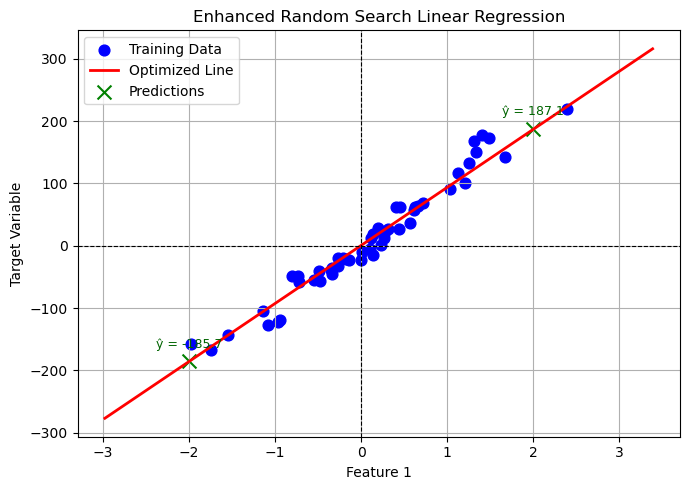

In [29]:
# ---------------------------
# 4. Visualization
# ---------------------------

plt.figure(figsize=(7, 5))

# Plot training data
plt.scatter(X[:,1], y, s=60, marker='o', label='Training Data', color='blue')

# Plot regression line
x_line = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
y_line = best_weights[0] + best_weights[1]*x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Optimized Line')

# Plot predictions
predictions = predict(x_new_sample, best_weights)
plt.scatter(x_sample, predictions, s=100, marker='x', color='green', label='Predictions')

# Add reference lines
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)

# Add labels and annotations
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('Enhanced Random Search Linear Regression')
plt.legend()
plt.grid(True)

# Add prediction annotations
for x_val, y_pred in zip(x_sample.flatten(), predictions):
    plt.annotate(f'ŷ = {y_pred:.1f}', (x_val, y_pred),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=9,
                 color='darkgreen')

plt.tight_layout()
plt.show()

In [31]:
# ---------------------------
# 5. Formatted Final Output
# ---------------------------
print("\n=== Random Search Results ===")
print(f"Optimal bias (w₀): {best_weights[0]:.4f}")
print(f"Optimal slope (w₁): {best_weights[1]:.4f}")
print(f"Minimum MSE achieved: {best_score:.4f}")
print("\nSample Predictions:")
for x_val, y_pred in zip(x_sample.flatten(), predictions):
    print(f"  At x = {x_val:3.0f}: Predicted y = {y_pred:.1f}")


=== Random Search Results ===
Optimal bias (w₀): 0.7019
Optimal slope (w₁): 93.1866
Minimum MSE achieved: 324.7847

Sample Predictions:
  At x =  -2: Predicted y = -185.7
  At x =   2: Predicted y = 187.1
